In [0]:
# Load various imports 
from datetime import datetime
from os import listdir
from os.path import isfile, join

import librosa
import librosa.display

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load per cycle data frame
import pickle
folder = "/content/drive/My Drive/Respiratory_Sound_Database/Respiratory_Sound_Database/" 
filename = folder + 'w_c_dataset.pickle'
infile = open(filename,'rb')
[sound,sr,lengths,times,labels] = pickle.load(infile)
infile.close()

In [0]:
def split_sounds(sounds,times,labels):
    s=[]
    l=[]
    for i,sound in enumerate(sounds):
        for t,label in zip(times[i],labels[i]):
            s.append(sound[int(t[0]):int(t[1])])
            if label==0:
                a=np.array([1,0,0,0])
            if label==1:
                a=np.array([0,1,0,0])
            if label==2:
                a=np.array([0,0,1,0])    
            if label==3:
                a=np.array([0,0,0,1])
            l.append(a)
    return s,l

In [0]:
[data,label]=split_sounds(sound,times,labels)

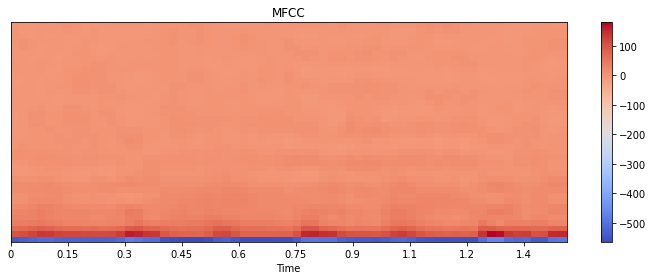

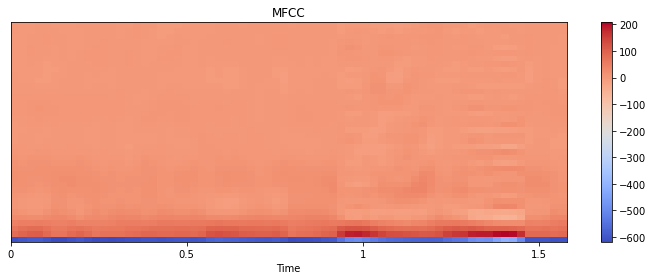

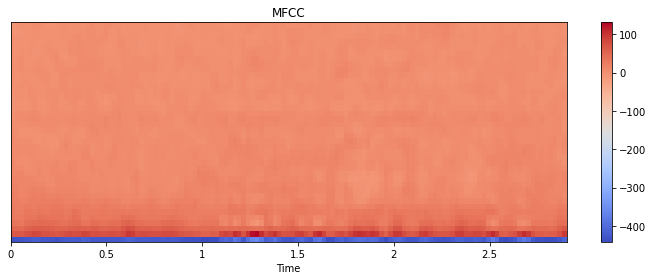

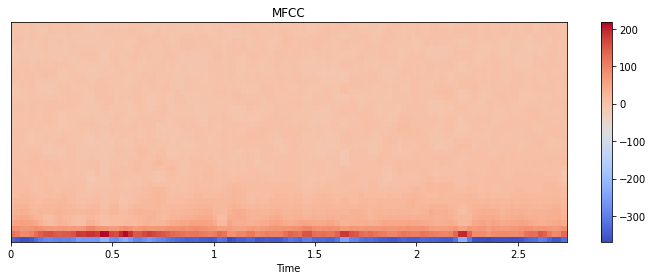

In [0]:

abnormal_index = [1,2,3,4]
crackle_index = [66,105]
wheezle_index = [36,38]
both_index = [132,133]

mfcc = librosa.feature.mfcc(y=data[2],n_mfcc=40)

# plot an MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

mfcc = librosa.feature.mfcc(y=data[66],n_mfcc=40)

# plot an MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


mfcc = librosa.feature.mfcc(y=data[36],n_mfcc=40)

# plot an MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


mfcc = librosa.feature.mfcc(y=data[132],n_mfcc=40)

# plot an MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

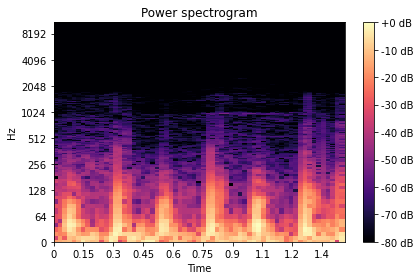

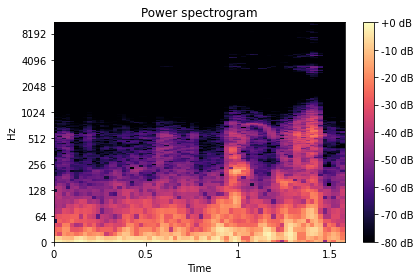

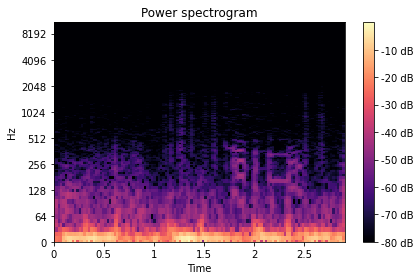

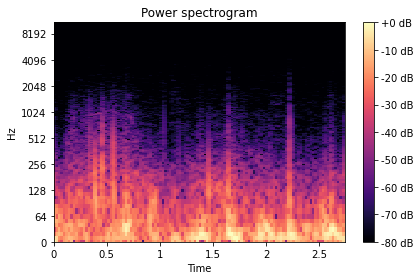

In [0]:
D_short = np.abs(librosa.stft(data[2]))

librosa.display.specshow(librosa.amplitude_to_db(D_short,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

D_short = np.abs(librosa.stft(data[66]))

librosa.display.specshow(librosa.amplitude_to_db(D_short,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

D_short = np.abs(librosa.stft(data[36]))

librosa.display.specshow(librosa.amplitude_to_db(D_short,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

D_short = np.abs(librosa.stft(data[132]))

librosa.display.specshow(librosa.amplitude_to_db(D_short,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
